In [53]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
from dateutil.relativedelta import relativedelta

def get_day_from_now(date_str):

    # Parse the date string into a datetime object
    target_date = parser.parse(date_str)

    # Get the current date
    current_date = datetime.now()

    # Calculate the difference in days
    days_from_now = (current_date - target_date).days
    return days_from_now


In [54]:
# Specify the path to the CSV file
csv_file_path = 'amazon_reviews.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

In [55]:
df['Review Date'] = df['Review Date'].apply(lambda date_str: date_str.split('on')[1].strip())

In [56]:
df['Review Day From Now'] = df['Review Date'].apply(lambda date_str: get_day_from_now(date_str))

0      50
1      67
2      72
3     101
4     499
     ... 
76    507
77    854
78    471
79    461
80    861
Name: Review Day From Now, Length: 81, dtype: int64

In [57]:
# Add 'Score' column with transformed values
df['Score'] = 100 * np.exp(-0.01*df['Ranking'])  # Calculate score using numpy's exp() function

In [58]:
df['Review Day From Now'] = df['Review Date'].apply(lambda date_str: get_day_from_now(date_str))


In [59]:
df['Comment Size'] = df['Review Text'].apply(lambda text: len(text))

In [60]:
# Convert 'Helpful Votes' column to numeric, coerce errors to NaN for non-numeric values
df['Helpful Votes'] = pd.to_numeric(df['Helpful Votes'], errors='coerce')

In [61]:
# Filter rows where 'Helpful Votes' values are not NaN (i.e., not converted to numeric successfully)
filtered_df = df[df['Helpful Votes'].notna()]

In [75]:
filtered_df['Image Score'] = filtered_df['Has Image'].apply(lambda has_image: 1 if has_image else 0)
filtered_df['Buyer Score'] = filtered_df['Verified Purchase'].apply(lambda has_purchased: 1 if has_purchased else 0)
filtered_df['Quality Score'] = 0.5* filtered_df['Comment Size'].apply(lambda comment_size: 1-((min(comment_size,1200)-600)**2)/600**2) + 0.25* filtered_df['Image Score']+ 0.25 * filtered_df['Buyer Score']
filtered_df['Like Score'] = filtered_df['Helpful Votes']
filtered_df['Time Score'] =  np.exp(-filtered_df['Review Day From Now']/45)
filtered_df['Rate Score'] =filtered_df['Rating']

/tmp/ipykernel_47456/1365335679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Image Score'] = filtered_df['Has Image'].apply(lambda has_image: 1 if has_image else 0)
/tmp/ipykernel_47456/1365335679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Buyer Score'] = filtered_df['Verified Purchase'].apply(lambda has_purchased: 1 if has_purchased else 0)
/tmp/ipykernel_47456/1365335679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [73]:
# Train Model
## Import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [81]:
X = filtered_df[['Rate Score', 'Time Score', 'Quality Score', 'Like Score']]
Y = filtered_df['Score']

In [82]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [92]:
# Initialize PolynomialFeatures to create polynomial and interaction features
poly = PolynomialFeatures(degree=1)  # Adjust the degree as needed

# Transform the input features to polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [93]:
# Initialize the polynomial regression model
model_poly = LinearRegression()

# Fit the model using the polynomial features
model_poly.fit(X_train_poly, y_train)


LinearRegression()

In [94]:
# Make predictions on the test data
y_pred_poly = model_poly.predict(X_test_poly)

# Calculate Mean Squared Error (MSE) and R-squared (coefficient of determination)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Polynomial Regression - R-squared (R2): {r2_poly:.2f}")


Polynomial Regression - Mean Squared Error (MSE): 252.13
Polynomial Regression - R-squared (R2): 0.25


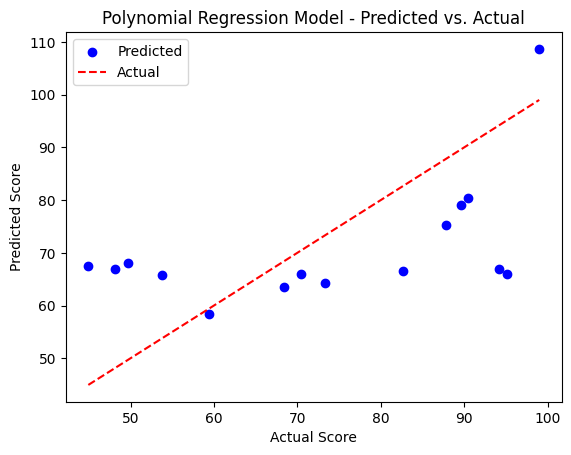

In [95]:
# Plot predicted vs. actual values for the test set
plt.scatter(y_test, y_pred_poly, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Polynomial Regression Model - Predicted vs. Actual')
plt.legend()
plt.show()

In [97]:
# Example prediction using new input features
new_input = [[1, 1, 1, 1]]  # New input features (time_score, quality_score, rate_score, like_score)

# Transform the new input features to polynomial features
new_input_poly = poly.transform(new_input)

# Make prediction using the polynomial regression model
predicted_score_poly = model_poly.predict(new_input_poly)

print(f"Predicted Score (Polynomial Regression): {predicted_score_poly[0]:.2f}")


Predicted Score (Polynomial Regression): 208.26


/home/hamed/anaconda3/envs/test/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [98]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [99]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 252.13
R-squared (R2): 0.25


In [100]:
# Retrieve the coefficients (weights) and intercept
weights = model.coef_
intercept = model.intercept_

print("Coefficients (Weights):", weights)
print("Intercept:", intercept)


Coefficients (Weights): [  1.24548245 137.57856065  19.0185301   -0.62467562]
Intercept: 51.040280436353555


In [105]:
result_df['Prdicted Score'] = pd.DataFrame(model.predict(X))

In [106]:
result_df['Score'] = Y

In [107]:
result_df

,0,Prdicted Score,Score
0,108.685123,108.685123,99.004983
1,104.643764,104.643764,98.019867
2,90.159247,90.159247,97.044553
3,80.001733,80.001733,96.078944
4,65.944358,65.944358,95.122942
...,...,...,...
68,63.425529,63.425529,50.157607
69,62.150453,62.150453,49.658530
70,62.828606,62.828606,NaN
71,62.618960,62.618960,48.675226
